In [59]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np


df = pd.read_csv('KS_train_data.csv', delimiter=',', error_bad_lines=False)
df


,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.000000,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.000000,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.000000,...,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.000000,...,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.000000,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy'...,theater,7595,US,1348677893,USD,1356552252,1.000000,...,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy'...",7595.43,False,7595.430000,"New York, NY",True,spaces,https://www.kickstarter.com/projects/jimmycarb...,https://www.kickstarter.com/projects/jimmycarb...
99996,KS_099996,307,Help create a permanent home for live comedy s...,theater,27196,US,1364939099,USD,1367674009,1.000000,...,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces,https://www.kickstarter.com/projects/rvacomedy...,https://www.kickstarter.com/projects/rvacomedy...
99997,KS_099997,143,Voix de Ville is a pop-up imaginarium of neo-v...,theater,7226,US,1366078694,USD,1373738400,1.000000,...,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces,https://www.kickstarter.com/projects/160171209...,https://www.kickstarter.com/projects/160171209...
99998,KS_099998,329,Help Synetic Theater create a new Studio to pr...,theater,31683,US,1372177000,USD,1376654340,1.000000,...,1373568644,Save the Studio!,31683.00,False,31683.000000,"Arlington, VA",True,spaces,https://www.kickstarter.com/projects/967829854...,https://www.kickstarter.com/projects/967829854...


#Data exploration

## Structure

**1. Does it have the right structure for the purpose? (can we give them an .xmml?)**
The train data consist of 10,000 project considering 19 variable, such as date event created, deadline,goal of the project. In my opnion, this is already a structured data, because we can find the framework of each project directly. Therefore, the data can be putted in xml file because they are already good structured. 
<br>
**2. Is the data structured by record?** Comparing this data with the Train data. Test data is merely dominated with categorial informattion comparing to numerical information. However, it is still well-structured, but less structured than Train data. 

**3. What are the record delimiters?**
Also, both data are fixed filled in the file. This can be seen by both data are despicted in rows and columns which then can be viewed into pre-defined data. This is clearly the indication of structured data. Nevertheless, the Delimiter is the ',' which indicates the separation of rows and columns. 

4. What are the field delimiters?

Looking at the CSV file, we can see that the field delimiters are regular commas

5. There are no column headlings

Are there column headlings?


##Granulariy

**Do you think the granularity is good enough for the purpose? (of this and that column)**
I believe it is slightly coarse and has some missing entries that might effect the success of the project in addition the reward column is too wide for it to have an effect

**2. Do all records represents reality at the same granularity?**
Yes


##Accuracy

**Can we check the validity of certain fields, such as e-mails, credit cards nr?** 
We can just by going to the url and comparing the data to the one we have even though it cannot be efficently done

## Correlations

<AxesSubplot:>

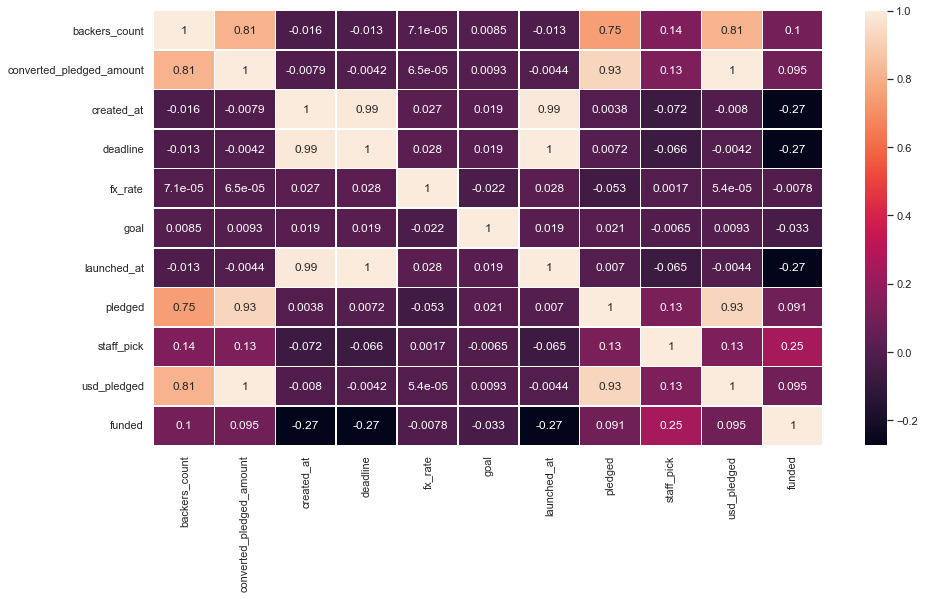

In [60]:
correlations = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(correlations, annot=True, linewidths=0.5)

# Outliers

/Users/nikitasfilosofof/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

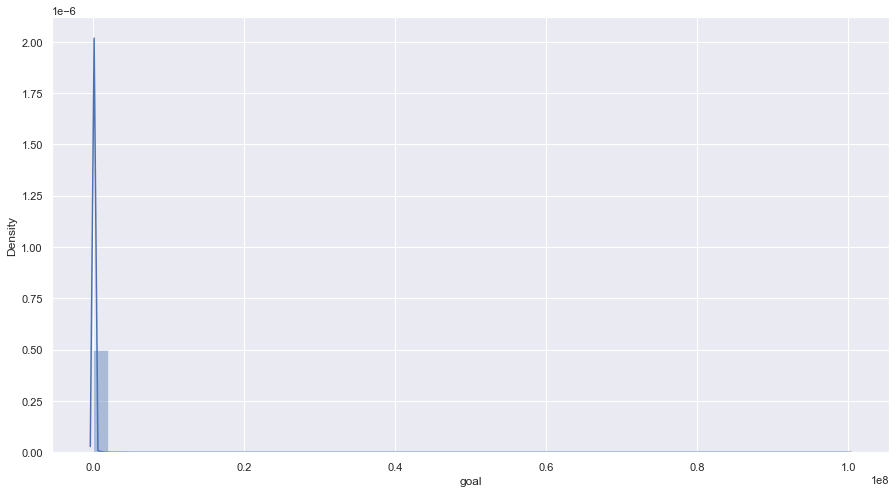

In [61]:
sns.distplot(df['goal'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


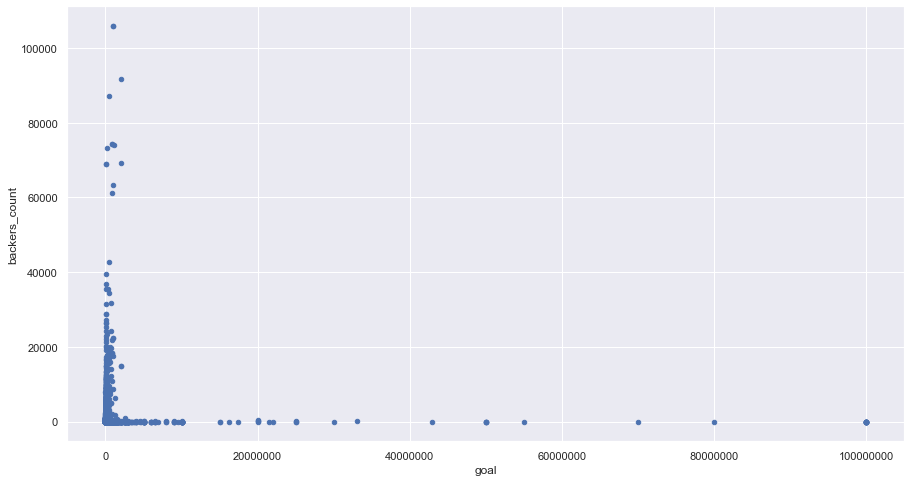

In [62]:
plot = df.plot.scatter(y='backers_count', x='goal')
plot.ticklabel_format(style='plain', useOffset=False)

We consider outliers the projects that have a goal > 1000000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


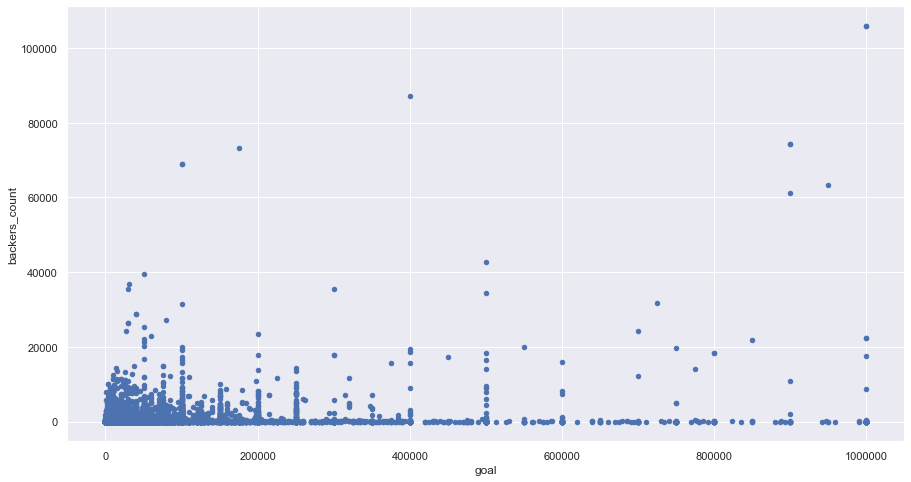

In [63]:
df = df.drop(df.loc[df['goal']>1000000].index) #delete outliers
plot = df.plot.scatter(y='backers_count', x='goal')
plot.ticklabel_format(style='plain', useOffset=False)

# Missing Values

In [64]:
df.isnull().sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

We see very few null values in the data. So we're going to manually visit the project pages and get the value (blurb, country, name) ourselves.

In [65]:
df.iat[1857, 5] = 'NA' #Namibia
df.at[46838, 'country'] = 'NA'
df.at[56883, 'country'] = 'NA'

df = df.drop(df.loc[df['blurb'].isnull()].index) #remove items that have no blurb
df = df.drop(df.loc[df['country'].isnull()==True].index) #remove items that have no blurb

df.isnull().sum()

project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

## Normatlity

((array([-4.34546776, -4.14666785, -4.03853817, ...,  4.03853817,
          4.14666785,  4.34546776]),
  array([1.e-02, 1.e+00, 1.e+00, ..., 1.e+06, 1.e+06, 1.e+06])),
 (29300.42961013953, 17512.080651541895, 0.502646784227168))

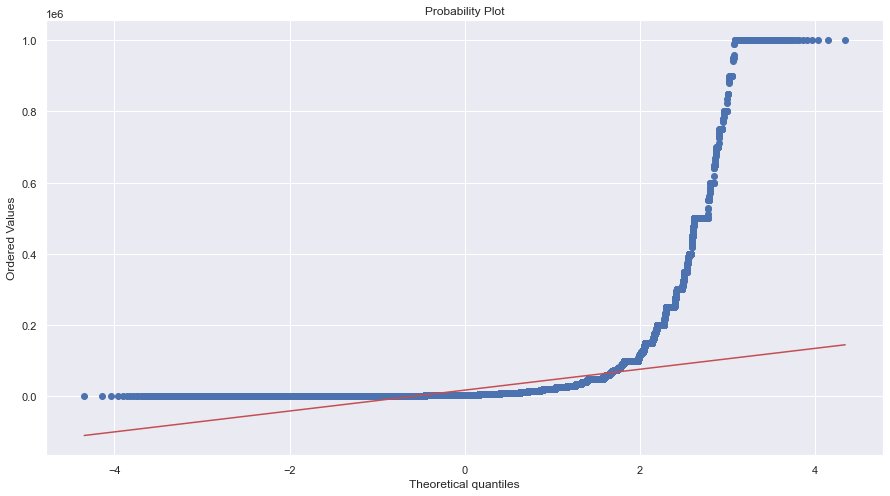

In [66]:
#sns.distplot(df['converted_pledged_amount'], fit=norm)

stats.probplot(df['goal'], plot=plt, dist='norm')

# Normalise Numerc data

In [67]:


df2=df.copy()

df2=df2.drop(['project_id','blurb','category','country','currency','name','created_at','deadline','launched_at','staff_pick','location','funded','subcategory', 'project_url', 'reward_url'],axis=1)
# df2=df2.set_index('project_id')
df2=df2.apply(pd.to_numeric)
df2= np.log10(df2)
df2 = df2.rename(columns={'backers_count': 'backers_count_log', 'converted_pledged_amount': 'converted_pledged_amount_log','fx_rate': 'fx_rate_log','goal': 'goal_log','pledged': 'pledged_log','usd_pledged': 'usd_pledged_log'})

# df=df.set_index('project_id')
df = df.merge(df2, left_index=True, how='inner',right_index=True)
df

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,funded,subcategory,project_url,reward_url,backers_count_log,converted_pledged_amount_log,fx_rate_log,goal_log,pledged_log,usd_pledged_log
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.000000,...,True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,1.903090,3.555820,0.000000,3.447158,3.555820,3.555820
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.000000,...,True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...,1.913814,3.661434,0.000000,3.653213,3.661434,3.661434
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.000000,...,True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...,1.322219,3.717421,0.000000,3.698970,3.717421,3.717421
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.000000,...,True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...,1.568202,3.854913,0.000000,3.812913,3.854913,3.854913
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.000000,...,True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...,2.184691,4.188788,0.000000,4.176091,4.188788,4.188788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy'...,theater,7595,US,1348677893,USD,1356552252,1.000000,...,True,spaces,https://www.kickstarter.com/projects/jimmycarb...,https://www.kickstarter.com/projects/jimmycarb...,2.017033,3.880528,0.000000,3.845098,3.880552,3.880552
99996,KS_099996,307,Help create a permanent home for live comedy s...,theater,27196,US,1364939099,USD,1367674009,1.000000,...,True,spaces,https://www.kickstarter.com/projects/rvacomedy...,https://www.kickstarter.com/projects/rvacomedy...,2.487138,4.434505,0.000000,4.397940,4.434516,4.434516
99997,KS_099997,143,Voix de Ville is a pop-up imaginarium of neo-v...,theater,7226,US,1366078694,USD,1373738400,1.000000,...,True,spaces,https://www.kickstarter.com/projects/160171209...,https://www.kickstarter.com/projects/160171209...,2.155336,3.858898,0.000000,3.740363,3.858898,3.858898
99998,KS_099998,329,Help Synetic Theater create a new Studio to pr...,theater,31683,US,1372177000,USD,1376654340,1.000000,...,True,spaces,https://www.kickstarter.com/projects/967829854...,https://www.kickstarter.com/projects/967829854...,2.517196,4.500826,0.000000,4.397940,4.500826,4.500826


# Feature Derivation

In [68]:


#Convert date date to correct format
df[['created_at','deadline','launched_at']] = df[['created_at','deadline','launched_at']].apply(pd.to_datetime,unit='s')

#Derive duration of project feature
df['duration'] = (df['deadline'] - df['launched_at'])

#Derive word count of blurb as a new feature

def word_count(blurb_list):
    word_list =[]
    for blurb_index in blurb_list:
        word_list.append(len(str(blurb_index).split()))
    return word_list

df['word_count'] = word_count(df['blurb'])


### Count of same day launces

In [69]:
# Count of same-day launches
dateFrame = df[['project_id','launched_at', 'deadline', 'duration']]
dateFrame['launched_at'] = dateFrame['launched_at'].dt.date
dateFrame['deadline'] = dateFrame['deadline'].dt.date

possibleDates = dateFrame['launched_at'].unique()
dateFrame['same_day_projects'] = 0

for date in possibleDates:
	sameDayProj = dateFrame.loc[dateFrame['launched_at']==date]
	dateFrame['same_day_projects'].loc[dateFrame['launched_at']==date] = len(sameDayProj)


dateFrame

/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_11711/1906967295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateFrame['launched_at'] = dateFrame['launched_at'].dt.date
/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_11711/1906967295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateFrame['deadline'] = dateFrame['deadline'].dt.date
/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_11711/1906967295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,project_id,launched_at,deadline,duration,same_day_projects
0,KS_000000,2012-03-28,2012-04-19,21 days 23:01:40,59
1,KS_000001,2012-03-29,2012-05-08,40 days 00:00:00,48
2,KS_000002,2012-03-29,2012-05-28,60 days 00:00:00,48
3,KS_000003,2012-03-29,2012-04-19,21 days 00:00:00,48
4,KS_000004,2012-03-29,2012-04-28,30 days 00:00:00,48
...,...,...,...,...,...
99995,KS_099995,2012-11-26,2012-12-26,30 days 00:00:00,33
99996,KS_099996,2013-04-04,2013-05-04,30 days 00:00:00,42
99997,KS_099997,2013-06-07,2013-07-13,36 days 16:30:40,32
99998,KS_099998,2013-07-11,2013-08-16,35 days 17:08:16,49


In [70]:
# Count of same time projects

#This is a dream that might dies because we can't find an efficient algorithm

# temp_df = pd.read_csv('KS_train_data.csv', delimiter=',')
# temp_df[['created_at','deadline','launched_at']] = df[['created_at','deadline','launched_at']].apply(pd.to_datetime,unit='s')


# temp_df['overlapping_time_count'] = 0
# for proj in range(len(temp_df)):
# 	for compProj in range(proj+1,len(temp_df)):
# 		if temp_df.at[proj,'deadline'] > temp_df.at[compProj, 'launched_at'] and temp_df.at[proj,'launched_at'] < temp_df.at[compProj,'deadline']:
# 			temp_df['overlapping_time_count'].iloc[proj] += 1
# 			temp_df['overlapping_time_count'].iloc[compProj] += 1



references data 

https://github.com/mkucz95/kickstarter_data/blob/master/kickstarter_data.ipynb

https://medium.com/swlh/kickstarter-projects-do-they-succeed-f4a789010585

https://towardsdatascience.com/kickstarter-projects-walk-through-simple-data-exploration-in-python-c2302a997789

https://towardsdatascience.com/using-machine-learning-to-predict-kickstarter-success-e371ab56a743